In [67]:
import calendar
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [68]:
df=pd.read_csv('prices.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [69]:
company_sym = input('Enter company symbol : ')
df=df.loc[df['symbol'] == company_sym]
print(df.tail())


Enter company symbol : AAPL
              date symbol        open       close         low        high  \
848767  2016-12-23   AAPL  115.589996  116.519997  115.589996  116.519997   
849267  2016-12-27   AAPL  116.519997  117.260002  116.489998  117.800003   
849767  2016-12-28   AAPL  117.519997  116.760002  116.199997  118.019997   
850267  2016-12-29   AAPL  116.449997  116.730003  116.400002  117.110001   
850767  2016-12-30   AAPL  116.650002  115.820000  115.430000  117.199997   

            volume  
848767  14249500.0  
849267  18296900.0  
849767  20905900.0  
850267  15039500.0  
850767  30586300.0  


In [70]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import math

<IPython.core.display.Javascript object>


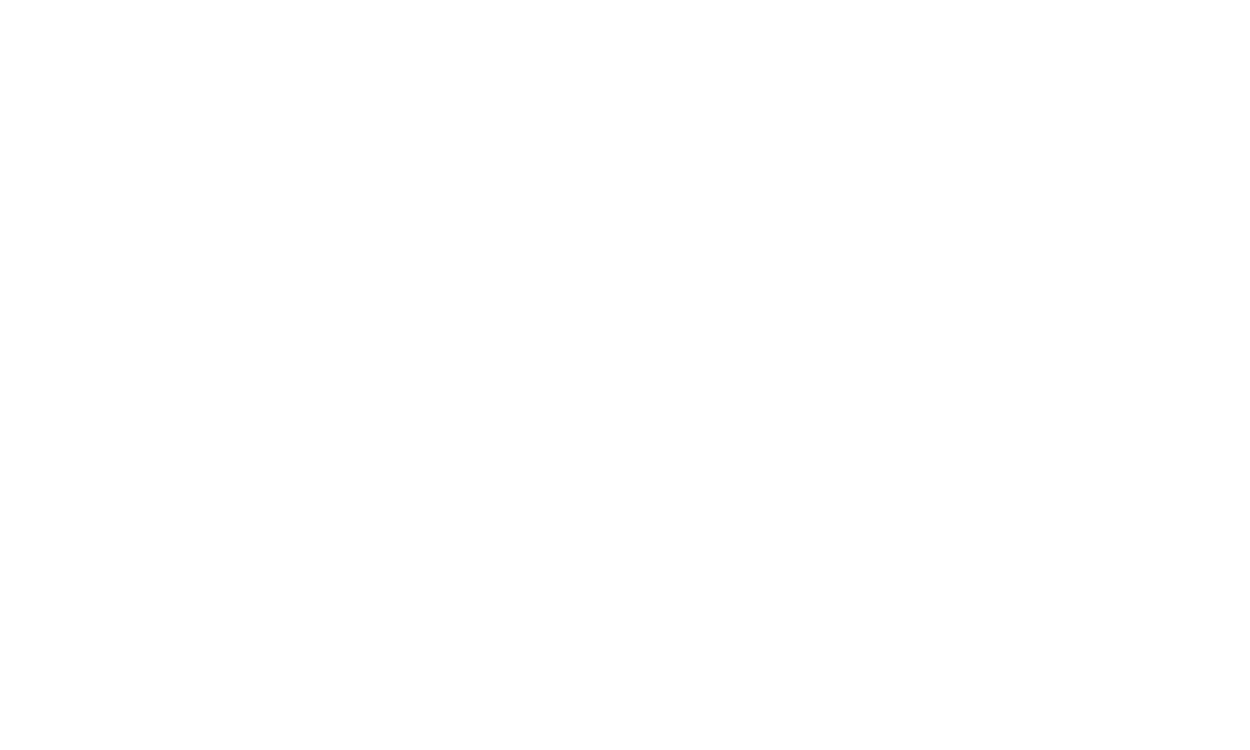

<IPython.core.display.Javascript object>


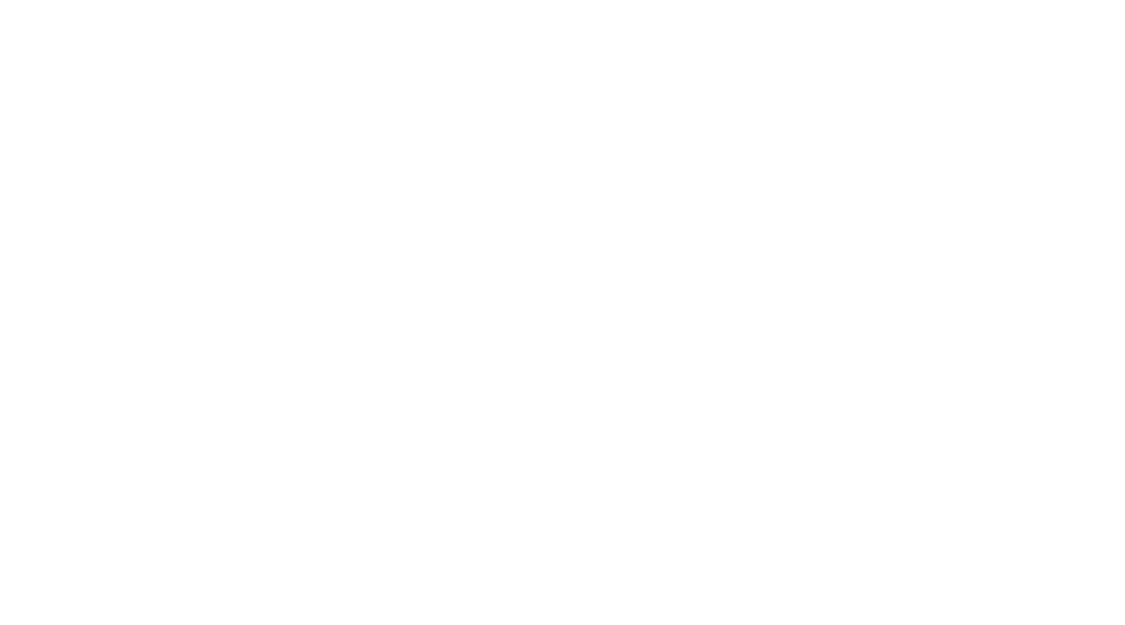

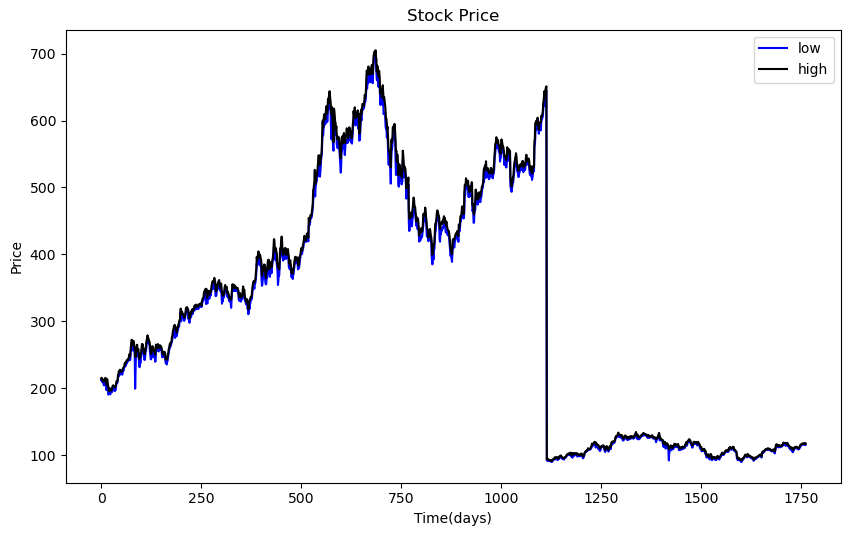

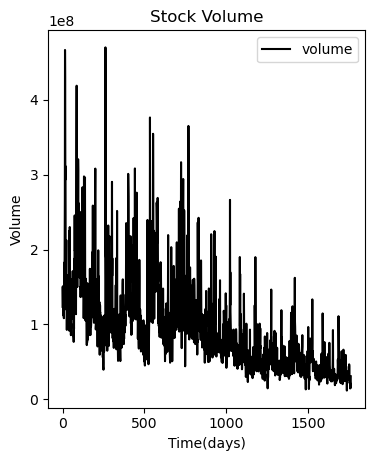

In [71]:
plt.figure(figsize=(10,6),dpi=100,facecolor='w',edgecolor='k')
plt.plot(df[df.symbol == company_sym].low.values,color='blue',label='low')
plt.plot(df[df.symbol == company_sym].high.values,color='black',label='high')
plt.title('Stock Price')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.legend(loc='best') 
plt.show()

fig=plt.figure(figsize=(9,5),dpi=100, facecolor='w',edgecolor='k')
plt.subplot(1,2,2)
plt.plot(df[df.symbol == company_sym].volume.values, color='black', label='volume')
plt.title('Stock Volume')
plt.xlabel('Time(days)')
plt.ylabel('Volume')
plt.legend(loc='best')

In [72]:
forecast_col = 'close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [73]:
X=np.array(df.drop(['label','symbol','date'], axis=1))
X = preprocessing.scale(X,axis=0)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [74]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)
forecast_set = clf.predict(X_lately)
print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].date
last_date=dt.strptime(last_date, '%Y-%m-%d')
last_date = calendar.timegm(last_date.utctimetuple())
last_unix = last_date
one_day = 86400
next_unix = last_unix + one_day

0.8913858909373508
[114.51103542 115.37070676 116.265938   118.37143349 117.10706074
 120.63914012 120.19599675 121.91969073 122.37161761 120.69405018
 120.8009973  121.24123774 120.77647362 119.57298222 120.491971
 120.34494988 120.00070204 120.44060027]


In [75]:
for i in forecast_set:
    next_date = dt.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
print('Company Symbol :',company_sym)
print(df.tail())

Company Symbol : AAPL
                    date symbol  open  close  low  high  volume  label  \
2016-12-19 05:30:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-20 05:30:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-21 05:30:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-22 05:30:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-23 05:30:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   

                       Forecast  
2016-12-19 05:30:00  119.572982  
2016-12-20 05:30:00  120.491971  
2016-12-21 05:30:00  120.344950  
2016-12-22 05:30:00  120.000702  
2016-12-23 05:30:00  120.440600  


<IPython.core.display.Javascript object>


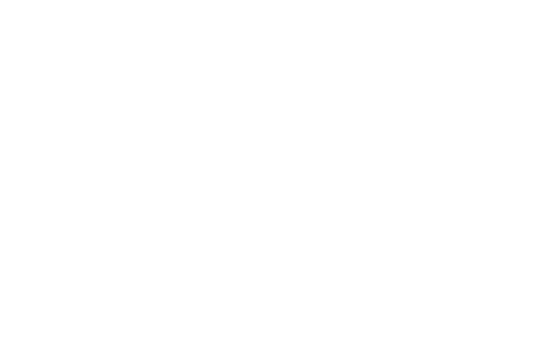

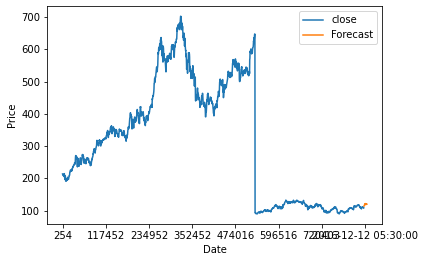

In [76]:
df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()